This is the auxiliary code for the 3F8 coursework. Some parts are missing and should be completed by the student. These are Marked with XXX

**Note that your changes will not be saved unless you click the "Copy to Drive" button above!**

In [38]:
# We load the data

import numpy as np

X = np.loadtxt('X.txt')
y = np.loadtxt('y.txt')

# We randomly permute the data

permutation = np.random.permutation(X.shape[ 0 ])
X = X[ permutation, : ]
y = y[ permutation ]

In [39]:
# We plot the data

import matplotlib.pyplot as plt

##
# Function that plots the points in 2D together with their labels
#
# Inputs:
#
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
# Output: 2D matrices with the x and y coordinates of the points shown in the plot
#

def plot_data_internal(X, y):
    x_min, x_max = X[ :, 0 ].min() - .5, X[ :, 0 ].max() + .5
    y_min, y_max = X[ :, 1 ].min() - .5, X[ :, 1 ].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    plt.figure()
    plt.xlim(xx.min(None), xx.max(None))
    plt.ylim(yy.min(None), yy.max(None))
    ax = plt.gca()
    ax.plot(X[y == 0, 0], X[y == 0, 1], 'ro', label = 'Class 1')
    ax.plot(X[y == 1, 0], X[y == 1, 1], 'bo', label = 'Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Plot data')
    plt.legend(loc = 'upper left', scatterpoints = 1, numpoints = 1)
    return xx, yy

##
# Function that plots the data without returning anything by calling "plot_data_internal".
#
# Input:
#
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
# Output: Nothing.
#

def plot_data(X, y):
    xx, yy = plot_data_internal(X, y)
    plt.show()

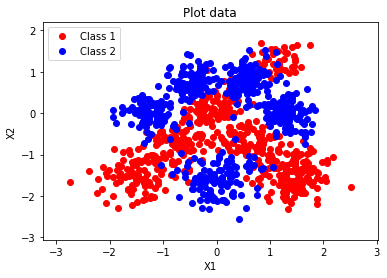

In [40]:
plot_data(X, y)

In [41]:
# We split the data into train and test sets

n_train = 800
X_train = X[ 0 : n_train, : ]
X_test = X[ n_train :, : ]
y_train = y[ 0 : n_train ]
y_test = y[ n_train : ]

In [42]:
# The logistic function

def logistic(x): return 1.0 / (1.0 + np.exp(-x))

##
# Function that makes predictions with a logistic classifier
#
# Input:
#
# X_tile: matrix of input features (with a constant 1 appended to the left) 
#         for which to make predictions
# w: vector of model parameters
#
# Output: The predictions of the logistic classifier
#

def predict(X_tilde, w): return logistic(np.dot(X_tilde, w))

##
# Function that computes the average loglikelihood of the logistic classifier on some data.
#
# Input:
#
# X_tile: matrix of input features (with a constant 1 appended to the left) 
#         for which to make predictions
# y: vector of binary output labels 
# w: vector of model parameters
#
# Output: The average loglikelihood
#

def compute_average_ll(X_tilde, y, w):
    output_prob = predict(X_tilde, w)
    return np.mean(y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob))

##
# Function that expands a matrix of input features by adding a column equal to 1.
#
# Input:
#
# X: matrix of input features.
#
# Output: Matrix x_tilde with one additional constant column equal to 1 added.
#

def get_x_tilde(X): return np.concatenate((np.ones((X.shape[ 0 ], 1 )), X), 1)

In [43]:
##
# Function that finds the model parameters by optimising the likelihood using gradient descent
#
# Input:
#
# X_tile_train: matrix of training input features (with a constant 1 appended to the left) 
# y_train: vector of training binary output labels 
# X_tile_test: matrix of test input features (with a constant 1 appended to the left) 
# y_test: vector of test binary output labels 
# alpha: step_size_parameter for the gradient based optimisation
# n_steps: the number of steps of gradient based optimisation
#
# Output: 
# 
# 1 - Vector of model parameters w 
# 2 - Vector with average log-likelihood values obtained on the training set
# 3 - Vector with average log-likelihood values obtained on the test set
#

def fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha):
    w = np.random.randn(X_tilde_train.shape[ 1 ])
    ll_train = np.zeros(n_steps)
    ll_test = np.zeros(n_steps)
    for i in range(n_steps):
        sigmoid_value = predict(X_tilde_train, w)

        dl_dw = np.matmul((y_train - sigmoid_value).T ,X_tilde_train)
        w += alpha*dl_dw # XXX Gradient-based update rule for w. To be completed by the student

        ll_train[ i ] = compute_average_ll(X_tilde_train, y_train, w)
        ll_test[ i ] = compute_average_ll(X_tilde_test, y_test, w)
        print(ll_train[ i ], ll_test[ i ])

    return w, ll_train, ll_test

In [44]:
# We train the classifier

alpha = 0.001# XXX Learning rate for gradient-based optimisation. To be completed by the student
n_steps = 100 # XXX Number of steps of gradient-based optimisation. To be completed by the student

X_tilde_train = get_x_tilde(X_train)
X_tilde_test = get_x_tilde(X_test)
w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)

-1.193999639879234 -1.3008564642508993
-1.069745982708402 -1.1617301095586197
-0.9618114514679647 -1.0399752335193524
-0.8715705452668098 -0.9370933487551525
-0.7994416090796568 -0.8535962553769358
-0.7446005612313261 -0.7886998784004896
-0.7049624836074706 -0.7403093287391811
-0.6775688822597951 -0.7054201906833067
-0.6592620881313143 -0.6807966378050455
-0.6472783874507217 -0.6635647124817132
-0.6395115944486082 -0.6514853233698497
-0.6344921696372086 -0.6429491569588595
-0.6312447618533008 -0.6368478278220171
-0.6291376651367515 -0.632431115091957
-0.6277655618882383 -0.6291924415019408
-0.6268687515095543 -0.6267877897432453
-0.6262804448692195 -0.6249812505577221
-0.6258931210662354 -0.6236091655171886
-0.6256371873042289 -0.6225565928632293
-0.6254674283094107 -0.62174179066647
-0.6253543663106561 -0.6211059018023944
-0.6252787242753456 -0.6206060296029429
-0.6252278603741631 -0.6202105410424007
-0.6251934618511042 -0.6198958466975854
-0.6251700479199139 -0.6196441690976942
-0.62

In [45]:
##
# Function that plots the average log-likelihood returned by "fit_w"
#
# Input:
#
# ll: vector with log-likelihood values
#
# Output: Nothing
#

def plot_ll(ll):
    plt.figure()
    ax = plt.gca()
    plt.xlim(0, len(ll) + 2)
    plt.ylim(min(ll) - 0.1, max(ll) + 0.1)
    ax.plot(np.arange(1, len(ll) + 1), ll, 'r-')
    plt.xlabel('Steps')
    plt.ylabel('Average log-likelihood')
    plt.title('Plot Average Log-likelihood Curve')
    plt.show()


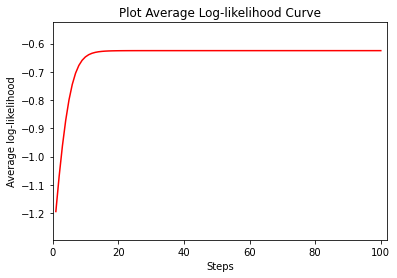

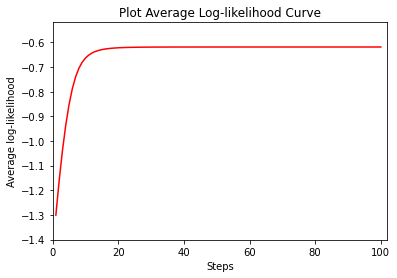

In [46]:
# We plot the training and test log likelihoods

plot_ll(ll_train)
plot_ll(ll_test)

In [47]:
##
# Function that plots the predictive probabilities of the logistic classifier
#
# Input:
#
# X: 2d array with the input features for the data (without adding a constant column with ones at the beginning)
# y: 1d array with the class labels (0 or 1) for the data
# w: parameter vector
# map_inputs: function that expands the original 2D inputs using basis functions.
#
# Output: Nothing.
#

def plot_predictive_distribution(X, y, w, map_inputs = lambda x : x):
    xx, yy = plot_data_internal(X, y)
    ax = plt.gca()
    X_tilde = get_x_tilde(map_inputs(np.concatenate((xx.ravel().reshape((-1, 1)), yy.ravel().reshape((-1, 1))), 1)))
    Z = predict(X_tilde, w)
    Z = Z.reshape(xx.shape)
    cs2 = ax.contour(xx, yy, Z, cmap = 'RdBu', linewidths = 2)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 14)
    plt.show()


# Confusion Matrix
from sklearn import metrics

def conf_matrix(y_true, y_pred):
    y_pred = np.where(y_pred > 0.5, 1, 0)
    confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()
    return

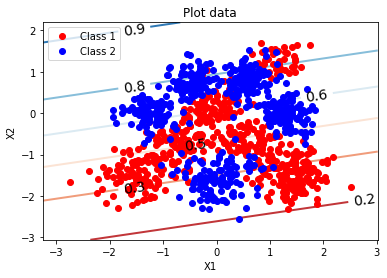

In [48]:
# We plot the predictive distribution

plot_predictive_distribution(X, y, w)

In [49]:
##
# Function that replaces initial input features by evaluating Gaussian basis functions
# on a grid of points
#
# Inputs:
#
# l: hyper-parameter for the width of the Gaussian basis functions
# Z: location of the Gaussian basis functions
# X: points at which to evaluate the basis functions
#
# Output: Feature matrix with the evaluations of the Gaussian basis functions.
#

def evaluate_basis_functions(l, X, Z):
    X2 = np.sum(X**2, 1)
    Z2 = np.sum(Z**2, 1)
    ones_Z = np.ones(Z.shape[ 0 ])
    ones_X = np.ones(X.shape[ 0 ])
    r2 = np.outer(X2, ones_Z) - 2 * np.dot(X, Z.T) + np.outer(ones_X, Z2)
    return np.exp(-0.5 / l**2 * r2)

-0.8173086427412533 -0.7524305420387819
-0.8048007612298906 -0.729817161916376
-0.7986895502446926 -0.717533449850224
-0.7955561958544111 -0.7106719526308296
-0.7937872371584617 -0.7067058646646351
-0.7926387946523324 -0.7043329305482038
-0.7917716889134758 -0.7028679190542642
-0.7910320873428808 -0.7019387076415963
-0.7903504018991743 -0.7013357499165537
-0.7896951955739894 -0.7009366858310073
-0.7890522767283715 -0.7006676684455911
-0.7884152415251031 -0.7004828727856736
-0.7877812010270364 -0.7003532286211829
-0.787148852120381 -0.700259984368345
-0.7865176069856024 -0.7001908963058392
-0.7858872003745176 -0.7001379005223941
-0.7852575124810535 -0.7000956538768552
-0.7846284890659493 -0.7000606013123927
-0.7840001054435016 -0.7000303708083878
-0.7833723502468269 -0.7000033766962566
-0.7827452181103365 -0.6999785576370965
-0.782118706371963 -0.6999552026521729
-0.7814928135871747 -0.6999328352079962
-0.7808675388594807 -0.6999111357984993
-0.7802428815388421 -0.6998898901562197
-0.77

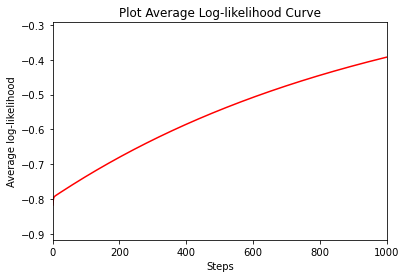

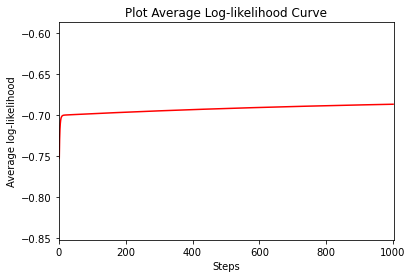

In [50]:
# We expand the data

l = 0.01 # XXX Width of the Gaussian basis funcction. To be completed by the student

X_tilde_train = get_x_tilde(evaluate_basis_functions(l, X_train, X_train))
X_tilde_test = get_x_tilde(evaluate_basis_functions(l, X_test, X_train))

# We train the new classifier on the feature expanded inputs

alpha = 0.002 # XXX Learning rate for gradient-based optimisation with basis functions. To be completed by the student 0.0001, 0.002, 0.00003
n_steps = 1000 # XXX Number of steps of gradient-based optimisation with basis functions. To be completed by the student 

w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)

plot_ll(ll_train)
plot_ll(ll_test)

-0.8134320581336317 -0.6950799038293956
-0.812675567051855 -0.6956658644853546
-0.8120486302929834 -0.696224552644187
-0.8115122219641583 -0.6967389687281706
-0.8110390692460822 -0.6972013890102785
-0.8106101219317536 -0.6976098934597164
-0.8102120777044647 -0.6979660455205324
-0.8098356499489919 -0.6982733631088425
-0.8094743564933552 -0.6985363287995426
-0.8091236731864905 -0.6987597643773538
-0.808780442691548 -0.6989484492335049
-0.8084424616696032 -0.6991069000162733
-0.8081081925872605 -0.6992392552829853
-0.8077765625549087 -0.699349227106147
-0.8074468229274464 -0.6994400941131462
-0.8071184513206076 -0.699514719019177
-0.8067910832323268 -0.6995755795602986
-0.8064644643260529 -0.6996248056946307
-0.806138417133626 -0.6996642186034688
-0.8058128178208659 -0.6996953687989538
-0.8054875799752047 -0.6997195718132906
-0.8051626432933758 -0.6997379407012708
-0.8048379656883259 -0.6997514150670747
-0.8045135177819879 -0.6997607866199934
-0.8041892790628213 -0.6997667214345935
-0.803

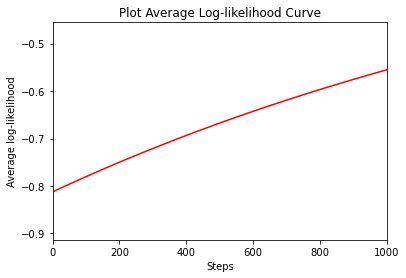

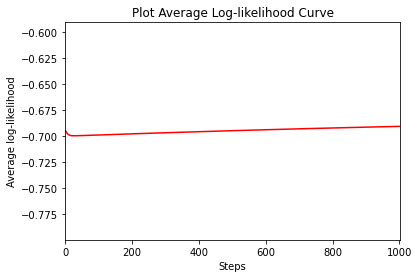

In [51]:
# We expand the data

l = 0.01 # XXX Width of the Gaussian basis funcction. To be completed by the student

X_tilde_train = get_x_tilde(evaluate_basis_functions(l, X_train, X_train))
X_tilde_test = get_x_tilde(evaluate_basis_functions(l, X_test, X_train))

# We train the new classifier on the feature expanded inputs

alpha = 0.001 # XXX Learning rate for gradient-based optimisation with basis functions. To be completed by the student 0.0001, 0.002, 0.00003
n_steps = 1000 # XXX Number of steps of gradient-based optimisation with basis functions. To be completed by the student 

w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)

plot_ll(ll_train)
plot_ll(ll_test)

-0.8309356465972424 -0.6953395957503458
-0.8267384153683447 -0.6943987983781128
-0.823706449551476 -0.6942448583632665
-0.8214914346146968 -0.6945591719537103
-0.8198475688950337 -0.6951305075981583
-0.8186022391442296 -0.6958221320145377
-0.8176346375848409 -0.6965481464190233
-0.8168604108593024 -0.697256797723917
-0.8162207542903624 -0.6979188904409981
-0.8156747190772182 -0.6985198430193941
-0.8151938120750143 -0.699054305993678
-0.8147582174396254 -0.6995225590830245
-0.8143541590037086 -0.6999281314523222
-0.8139720618256763 -0.7002762555847013
-0.8136052721232281 -0.700572884316484
-0.8132491666392785 -0.70082408469773
-0.8129005332700876 -0.7010356811512
-0.8125571404826016 -0.7012130612186322
-0.812217438046423 -0.7013610853457273
-0.8118803490670924 -0.7014840614903451
-0.811545125482734 -0.7015857585456817
-0.8112112476657248 -0.7016694415462836
-0.81087835467197 -0.701737917689687
-0.8105461957845606 -0.7017935862756834
-0.8102145968520768 -0.7018384883715763
-0.80988343690

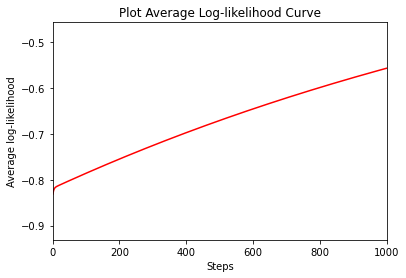

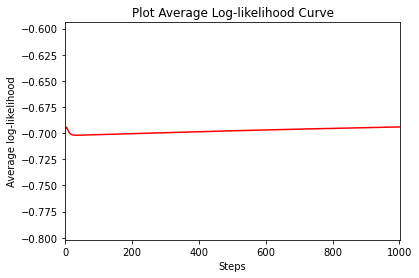

In [52]:
# We expand the data

l = 0.01 # XXX Width of the Gaussian basis funcction. To be completed by the student

X_tilde_train = get_x_tilde(evaluate_basis_functions(l, X_train, X_train))
X_tilde_test = get_x_tilde(evaluate_basis_functions(l, X_test, X_train))

# We train the new classifier on the feature expanded inputs

alpha = 0.001 # XXX Learning rate for gradient-based optimisation with basis functions. To be completed by the student 0.0001, 0.002, 0.00003
n_steps = 1000 # XXX Number of steps of gradient-based optimisation with basis functions. To be completed by the student 

w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)

plot_ll(ll_train)
plot_ll(ll_test)

confusion_

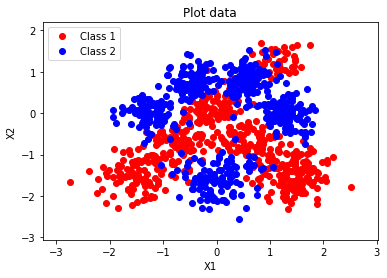

In [55]:
# We plot the predictive distribution

plot_predictive_distribution(X, y, w, lambda x : evaluate_basis_functions(l, x, X_train))